In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, pystan as ps, pickle
from pylab import plot, show, legend
from functions_garch import *
from scipy.stats import *
import arviz as az
import json

In [3]:
rescales = [2.0, 3.0, 5.0]
rescale = 2.0
n_exp = len(rescales)
path = 'multiple_sims/'+str(rescale)

#
file = open(path+"/full_mcmc.pkl", "rb")
trace_full = pickle.load(file)

# read the shape, etc
m = 10
n_mcmc, p = np.shape(trace_full['beta'])
q = np.shape(trace_full['alpha'])[1]
d = np.shape(trace_full['b'])[1]

In [7]:
p, q, d
# p --> beta
# q -- > alpha
# d --> b
var_names = ['beta', 'alpha', 'b', 'omega']

In [21]:
def cred_ints_dc(quantiles, path):
    n_q = len(quantiles)
    quant_dc = {}
    quant_dc['beta'] = np.zeros((n_q, p))
    quant_dc['alpha'] = np.zeros((n_q, q))
    quant_dc['b'] = np.zeros((n_q, d))
    quant_dc['omega'] = np.zeros((n_q))
    for i in range(m):
        file = open(path+"/mcmc_wb_chunk"+str(i+1)+".pkl", "rb")
        trace = pickle.load(file)
        for var_name in var_names:
            #print(var_name)
            quant_dc[var_name] += np.percentile(trace[var_name],axis=0,q=quantiles)/m
            
    return quant_dc

def cred_ints_full(quantiles, path):
    n_q = len(quantiles)
    quant_full = {}
    quant_full['beta'] = np.zeros((n_q, p))
    quant_full['alpha'] = np.zeros((n_q, q))
    quant_full['b'] = np.zeros((n_q, d))
    quant_full['omega'] = np.zeros((n_q))
    file = open(path+"/full_mcmc.pkl", "rb")
    trace = pickle.load(file)
    for var_name in var_names:
        quant_full[var_name] = np.percentile(trace[var_name],axis=0,q=quantiles)
        
    return quant_full

In [34]:
results = {}
quantiles = np.arange(0.1, 1.0, 0.1)
for rescale in rescales:
    path = 'multiple_sims/'+str(rescale)
    rescale_str = str(rescale)
    results[rescale] = {}
    results[rescale]['full'] = cred_ints_full(quantiles, path)
    results[rescale]['dc'] =  cred_ints_dc(quantiles, path)
    # calculate the errors
    error = {}
    for var_name in var_names:
        error[var_name] = np.absolute(results[rescale]['dc'][var_name] - results[rescale]['full'][var_name])
    results[rescale]['error'] = error

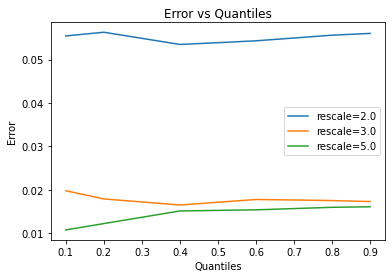

In [39]:
# Plotting the line chart
plt.plot(quantiles, np.mean(results[2.0]['error']['alpha'], axis =1), label='rescale=2.0')
plt.plot(quantiles, np.mean(results[3.0]['error']['alpha'], axis =1), label='rescale=3.0')
plt.plot(quantiles, np.mean(results[5.0]['error']['alpha'], axis =1), label='rescale=5.0')

# Adding labels and title
plt.xlabel('Quantiles')
plt.ylabel('Error')
plt.title('Error vs Quantiles')

# Adding a legend
plt.legend()

# Displaying the chart
plt.show()

In [31]:
alls = set()
n = 7
for i in range(1, n+1):
    lst = set()
    lst.add(i)
    if i+1 <= n:
        lst.add(i+1)
    for j in range(1, n+1):
        lst_copy = lst.copy()
        if j in lst_copy:
            continue
        lst_copy.add(j)
        if j+1 in lst_copy:
            lst_copy.remove(j+1)
        elif j+1 <= n:
            lst_copy.add(j+1)
        alls.add(tuple(sorted(lst_copy)))
print(alls)
len(alls)

{(4, 6), (5, 7), (1, 2, 3, 4), (1, 3), (3, 4, 7), (3, 4, 5, 6), (5, 6, 7), (2, 3, 4, 5), (1, 2, 4, 5), (1, 2, 7), (2, 4), (3, 4, 6, 7), (2, 3, 5, 6), (2, 3, 6, 7), (1, 2, 5, 6), (3, 5), (6,), (4, 5, 7), (2, 3, 7), (4, 5, 6, 7), (1, 2, 6, 7)}


21

In [26]:
sorted([all for all in alls if len(all) == 4])

[(1, 2, 3, 4), (1, 2, 4, 5), (2, 3, 4, 5)]